# Importing Data

In [1]:
import pandas as pd
import numpy as np
import io
import pandas_profiling

retail_raw = pd.read_csv("https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced_data_quality.csv")

# Inspeksi tipe data

In [2]:
# Cetak tipe data di setiap kolom retail_raw
print(retail_raw.dtypes)

order_id         int64
order_date      object
customer_id      int64
city            object
province        object
product_id      object
brand           object
quantity       float64
item_price     float64
dtype: object


# Descriptive Statistics - Part 1

In [3]:
# Kolom city
length_city = len(retail_raw["city"])
print("Length kolom city", length_city)

Length kolom city 5000


In [4]:
# Kolom product_id
length_product_id = len(retail_raw["product_id"])
print("Length kolom product_id", length_product_id)

Length kolom product_id 5000


# Descriptive Statistics - Part 2

In [5]:
# Count kolom city
count_city = retail_raw["city"].count()
print("Count kolom city", count_city)

Count kolom city 4984


In [6]:
# Count kolom product_id
count_product_id = retail_raw["product_id"].count()
print("Count kolom product_id", count_product_id)

Count kolom product_id 4989


# Descriptive Statistics - Part 3

In [7]:
# Missing value pada kolom city
number_of_missing_values_city = length_city - count_city
float_of_missing_values_city = float(number_of_missing_values_city/length_city)
pct_of_missing_values_city = '{0:.1f}%'.format(float_of_missing_values_city * 100)
print('Persentase missing value kolom city', pct_of_missing_values_city)

Persentase missing value kolom city 0.3%


In [8]:
# Tugas praktek: Missing value pada kolom product_id
number_of_missing_values_product_id = length_product_id - count_product_id
float_of_missing_values_product_id = float(number_of_missing_values_product_id/length_product_id)
pct_of_missing_values_product_id = '{0:.1f}%'.format(float_of_missing_values_product_id * 100)
print('Persentase missing value kolom product_id:', pct_of_missing_values_product_id)

Persentase missing value kolom product_id: 0.2%


# Descriptive Statistics - Part 4

In [9]:
# Deskriptif statistics kolom quantity
print('Kolom quantity')
print('Minimum value: ', retail_raw['quantity'].min())
print('Maximum value: ', retail_raw['quantity'].max())
print('Mean value: ', retail_raw['quantity'].mean())
print('Mode value: ', retail_raw['quantity'].mode())
print('Median value: ', retail_raw['quantity'].median())
print('Standard Deviation value: ', retail_raw['quantity'].std())

Kolom quantity
Minimum value:  1.0
Maximum value:  720.0
Mean value:  11.423987164059366
Mode value:  0    1.0
dtype: float64
Median value:  5.0
Standard Deviation value:  29.442025010811317


In [10]:
# Tugas praktek: Deskriptif statistics kolom item_price
print('Kolom item_price')
print('Minimum value: ', retail_raw['item_price'].min())
print('Maximum value: ', retail_raw['item_price'].max())
print('Mean value: ', retail_raw['item_price'].mean())
print('Median value: ', retail_raw['item_price'].median())
print('Standard Deviation value: ', retail_raw['item_price'].std())

Kolom item_price
Minimum value:  26000.0
Maximum value:  29762000.0
Mean value:  933742.7311008623
Median value:  604000.0
Standard Deviation value:  1030829.8104242863


# Descriptive Statistics - Part 5

In [11]:
# Quantile statistics kolom quantity
print("Kolom quantity")
print(retail_raw["quantity"].quantile([0.25, 0.5, 0.75]))

Kolom quantity
0.25     2.0
0.50     5.0
0.75    12.0
Name: quantity, dtype: float64


In [12]:
# Tugas praktek: Quantile statistics kolom item_price
print('Kolom item_price:')
print(retail_raw['item_price'].quantile([0.25, 0.5, 0.75]))

Kolom item_price:
0.25     450000.0
0.50     604000.0
0.75    1045000.0
Name: item_price, dtype: float64


# Descriptive Statistics - Part 6

In [13]:
print('Korelasi quantity dengan item_price')
print(retail_raw[['quantity', 'item_price']].corr())

Korelasi quantity dengan item_price
            quantity  item_price
quantity    1.000000   -0.133936
item_price -0.133936    1.000000


# Penggunaan Profiling Libraries

In [14]:
import pandas_profiling

In [ ]:
# Penggunaan ProfileReport pada DataFrame: retail_raw
pandas_profiling.ProfileReport(retail_raw)

# Missing Data

In [16]:
# Check kolom yang memiliki missing data
print('Check kolom yang memiliki missing data:')
print(retail_raw.isnull().any())

Check kolom yang memiliki missing data:
order_id       False
order_date     False
customer_id    False
city            True
province        True
product_id      True
brand          False
quantity        True
item_price      True
dtype: bool


In [17]:
# Filling the missing value (imputasi)
print('\nFilling the missing value (imputasi):')
print(retail_raw['quantity'].fillna(retail_raw.quantity.mean()))


Filling the missing value (imputasi):
0       10.0
1        2.0
2        8.0
3        4.0
4        2.0
        ... 
4995     2.0
4996     3.0
4997     4.0
4998     8.0
4999     1.0
Name: quantity, Length: 5000, dtype: float64


In [18]:
# Drop missing value
print('\nDrop missing value:')
print(retail_raw['quantity'].dropna())


Drop missing value:
0       10.0
1        2.0
2        8.0
3        4.0
4        2.0
        ... 
4995     2.0
4996     3.0
4997     4.0
4998     8.0
4999     1.0
Name: quantity, Length: 4986, dtype: float64


# Tugas Praktek

In [19]:
print(retail_raw['item_price'].fillna(retail_raw['item_price'].mean()))

0       7.400000e+05
1       6.040000e+05
2       1.045000e+06
3       2.050000e+05
4       9.337427e+05
            ...     
4995    4.500000e+05
4996    1.465000e+06
4997    7.470000e+05
4998    6.950000e+05
4999    1.045000e+06
Name: item_price, Length: 5000, dtype: float64


# Outliers

In [20]:
# Q1, Q3, dan IQR
Q1 = retail_raw['quantity'].quantile(0.25)
Q3 = retail_raw['quantity'].quantile(0.75)
IQR = Q3 - Q1

In [21]:
# Check ukuran (baris dan kolom) sebelum data yang outliers dibuang
print('Shape awal: ', retail_raw.shape)

Shape awal:  (5000, 9)


In [22]:
# Removing outliers
retail_raw = retail_raw[~((retail_raw['quantity'] < (Q1 - 1.5 * IQR)) | (retail_raw['quantity'] > (Q3 + 1.5 * IQR)))]

In [23]:
# Check ukuran (baris dan kolom) setelah data yang outliers dibuang
print('Shape akhir: ', retail_raw.shape)

Shape akhir:  (4699, 9)


# Tugas Praktek

In [24]:
# Q1, Q3, dan IQR
Q1 = retail_raw['item_price'].quantile(0.25)
Q3 = retail_raw['item_price'].quantile(0.75)
IQR = Q3 - Q1

In [25]:
# Check ukuran (baris dan kolom) sebelum data yang outliers dibuang
print('Shape awal: ', retail_raw.shape)

Shape awal:  (4699, 9)


In [26]:
# Removing outliers
retail_raw = retail_raw[~((retail_raw['item_price'] < (Q1 - 1.5 * IQR)) | (retail_raw['item_price'] > (Q3 + 1.5 * IQR)))]

In [27]:
# Check ukuran (baris dan kolom) setelah data yang outliers dibuang
print('Shape akhir: ', retail_raw.shape)

Shape akhir:  (4379, 9)


# Deduplikasi Data
# Tugas Praktek

In [28]:
# Check ukuran (baris dan kolom) sebelum data duplikasi dibuang
print('Shape awal: ', retail_raw.shape)

Shape awal:  (4379, 9)


In [29]:
# Buang data yang terduplikasi
retail_raw.drop_duplicates(inplace=True)

In [30]:
# Check ukuran (baris dan kolom) setelah data duplikasi dibuang
print('Shape akhir: ', retail_raw.shape)

Shape akhir:  (4373, 9)


# Case Studi: Data Profiling

In [31]:
# Baca dataset uncleaned_raw.csv
uncleaned_raw = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/uncleaned_raw.csv')

In [32]:
#inspeksi dataframe uncleaned_raw
print('Lima data teratas:') 
print(uncleaned_raw.head())

Lima data teratas:
   InvoiceNo                          Description  ...  CustomerID      City
0     536365   WHITE HANGING HEART T-LIGHT HOLDER  ...       17850  Surabaya
1     536366                  WHITE METAL LANTERN  ...       17850  Surabaya
2     536367       CREAM CUPID HEARTS COAT HANGER  ...       17850  Surabaya
3     536368  KNITTED UNION FLAG HOT WATER BOTTLE  ...       17850   Jakarta
4     536369       RED WOOLLY HOTTIE WHITE HEART.  ...       17850     Medan

[5 rows x 7 columns]


In [33]:
#Check kolom yang mengandung missing value
print('\nKolom dengan missing value:') 
print(uncleaned_raw.isnull().any())


Kolom dengan missing value:
InvoiceNo      False
Description    False
Quantity        True
InvoiceDate    False
UnitPrice      False
CustomerID     False
City           False
dtype: bool


In [34]:
#Persentase missing value
length_qty = len(uncleaned_raw['Quantity'])
count_qty = uncleaned_raw['Quantity'].count()

In [35]:
#mengurangi length dengan count
number_of_missing_values_qty = length_qty - count_qty

In [36]:
#mengubah ke bentuk float
float_of_missing_values_qty = float(number_of_missing_values_qty / length_qty) 

In [37]:
#mengubah ke dalam bentuk persen
pct_of_missing_values_qty = '{0:.1f}%'.format(float_of_missing_values_qty * 100) 

In [38]:
#print hasil percent dari missing value
print('Persentase missing value kolom Quantity:', pct_of_missing_values_qty)

Persentase missing value kolom Quantity: 4.0%


In [39]:
#Mengisi missing value tersebut dengan mean dari kolom tersebut
uncleaned_raw['Quantity'] = uncleaned_raw['Quantity'].fillna(uncleaned_raw['Quantity'].mean())

# Case Study: Data Cleansing - Part 1

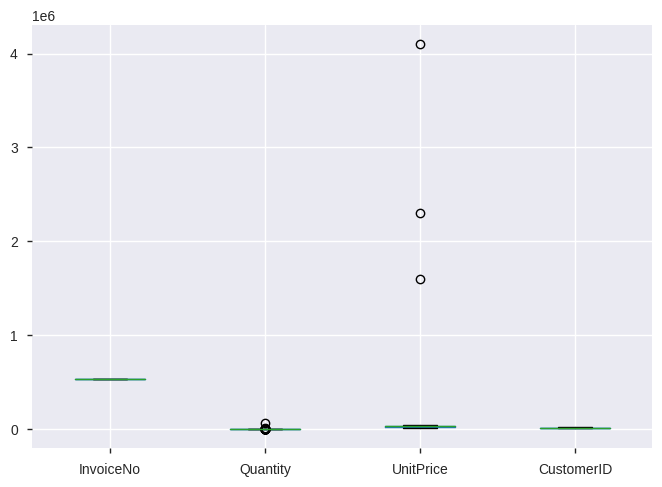

In [40]:
import matplotlib.pyplot as plt

#Mengetahui kolom yang memiliki outliers!
uncleaned_raw.boxplot()
plt.show()

# Case Study: Data Cleansing - Part 2

In [41]:
#Check IQR
Q1 = uncleaned_raw['UnitPrice'].quantile(0.25)
Q3 = uncleaned_raw['UnitPrice'].quantile(0.75)
IQR = Q3 - Q1

In [42]:
#removing outliers
uncleaned_raw = uncleaned_raw[~((uncleaned_raw[['UnitPrice']] < (Q1 - 1.5 * IQR)) | (uncleaned_raw[['UnitPrice']] > (Q3 + 1.5 * IQR)))]

In [43]:
#check for duplication
print(uncleaned_raw.duplicated(subset=None))

0      False
1      False
2      False
3      False
4      False
       ...  
500     True
501     True
502     True
503     True
504     True
Length: 505, dtype: bool


In [44]:
#remove duplication
uncleaned_raw = uncleaned_raw.drop_duplicates()